## Analyzing Adult Income (Data Wrangling and Visualization)

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: 50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

Acknowledgements
This dataset named “adult” is found in the UCI machine learning repository
https://www.kaggle.com/wenruliu/adult-income-dataset

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

### Data Wrangling

In [149]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [150]:
# load the dataset
adult_data=pd.read_csv('adult.csv')
adult_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [151]:
# check the length of dataset
adult_data.shape

(48842, 15)

### Data Cleaning
#### Check duplicate values and drop them

In [152]:
# check duplicate values
adult_data[adult_data.duplicated()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [153]:
adult_data[adult_data.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 864 to 48685
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              52 non-null     int64 
 1   workclass        52 non-null     object
 2   fnlwgt           52 non-null     int64 
 3   education        52 non-null     object
 4   educational-num  52 non-null     int64 
 5   marital-status   52 non-null     object
 6   occupation       52 non-null     object
 7   relationship     52 non-null     object
 8   race             52 non-null     object
 9   gender           52 non-null     object
 10  capital-gain     52 non-null     int64 
 11  capital-loss     52 non-null     int64 
 12  hours-per-week   52 non-null     int64 
 13  native-country   52 non-null     object
 14  income           52 non-null     object
dtypes: int64(6), object(9)
memory usage: 6.5+ KB


In [154]:
# drop duplicate values
adult_data.drop_duplicates(keep=False, inplace=True)
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48741 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48741 non-null  int64 
 1   workclass        48741 non-null  object
 2   fnlwgt           48741 non-null  int64 
 3   education        48741 non-null  object
 4   educational-num  48741 non-null  int64 
 5   marital-status   48741 non-null  object
 6   occupation       48741 non-null  object
 7   relationship     48741 non-null  object
 8   race             48741 non-null  object
 9   gender           48741 non-null  object
 10  capital-gain     48741 non-null  int64 
 11  capital-loss     48741 non-null  int64 
 12  hours-per-week   48741 non-null  int64 
 13  native-country   48741 non-null  object
 14  income           48741 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.9+ MB


### Statistics

In [155]:
# statistical data of the numerical values
adult_data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48741.000000,4.874100e+04,48741.000000,48741.000000,48741.000000,48741.000000
mean,38.661107,1.896775e+05,10.079235,1081.303646,87.683634,40.429577
std,13.706556,1.056289e+05,2.569661,7459.574110,403.402187,12.393710
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175560e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781370e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.375810e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [156]:
# statistical data of the categorical values
adult_data.describe(include=object)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48741,48741,48741,48741,48741,48741,48741,48741,48741
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33817,15756,22353,6158,19690,41669,32580,43752,37066


In [157]:
# quick overvview of the dataset
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48741 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48741 non-null  int64 
 1   workclass        48741 non-null  object
 2   fnlwgt           48741 non-null  int64 
 3   education        48741 non-null  object
 4   educational-num  48741 non-null  int64 
 5   marital-status   48741 non-null  object
 6   occupation       48741 non-null  object
 7   relationship     48741 non-null  object
 8   race             48741 non-null  object
 9   gender           48741 non-null  object
 10  capital-gain     48741 non-null  int64 
 11  capital-loss     48741 non-null  int64 
 12  hours-per-week   48741 non-null  int64 
 13  native-country   48741 non-null  object
 14  income           48741 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.9+ MB


In [158]:
# check null values
adult_data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [159]:
adult_data['income'].value_counts() / len(adult_data) * 100

<=50K    76.04686
>50K     23.95314
Name: income, dtype: float64

In [160]:
adult_data['gender'].value_counts()

Male      32580
Female    16161
Name: gender, dtype: int64

In [161]:
adult_data.groupby(by='income').mean().T

income,<=50K,>50K
age,36.892273,44.276831
fnlwgt,190050.911320,188492.139015
educational-num,9.599040,11.603769
capital-gain,147.363298,4046.394261
capital-loss,54.281957,193.727880
hours-per-week,38.846274,45.456274


In [162]:
adult_data.groupby(by='income').describe(include=object).T

income                         <=50K                >50K
workclass      count           37066               11675
               unique              9                   8
               top           Private             Private
               freq            26442                7375
education      count           37066               11675
               unique             16                  16
               top           HS-grad           Bachelors
               freq            13257                3309
marital-status count           37066               11675
               unique              7                   7
               top     Never-married  Married-civ-spouse
               freq            15317                9972
occupation     count           37066               11675
               unique             15                  15
               top      Adm-clerical     Exec-managerial
               freq             4833                2904
relationship   count           37066               11675
               unique              6                   6
               top     Not-in-family             Husband
               freq            11258                8834
race           count           37066               11675
               unique              5                   5
               top             White               White
               freq            31074               10595
gender         count           37066               11675
               unique              2                   2
               top              Male                Male
               freq            22674                9906
native-country count           37066               11675
               unique             42                  41
               top     United-States       United-States
               freq            33070               10682

In [163]:
adult_data.groupby(by='income')['gender'].value_counts()

income  gender
<=50K   Male      22674
        Female    14392
>50K    Male       9906
        Female     1769
Name: gender, dtype: int64

In [164]:
pd.crosstab(adult_data['marital-status'], adult_data['income'])

income,<=50K,>50K
marital-status,,
Divorced,5956,671
Married-AF-spouse,23,14
Married-civ-spouse,12381,9972
Married-spouse-absent,568,58
Never-married,15317,733
Separated,1431,99
Widowed,1390,128


In [165]:
pd.crosstab(adult_data['education'], adult_data['income'])

income,<=50K,>50K
education,,
10th,1302,87
11th,1720,92
12th,605,48
1st-4th,236,8
5th-6th,478,27
7th-8th,891,62
9th,715,41
Assoc-acdm,1188,413
Assoc-voc,1537,522


In [166]:
adult_data['occupation'] = adult_data['occupation'].replace("?", "unknown")

In [167]:
pd.crosstab(adult_data['occupation'], adult_data['income'])

income,<=50K,>50K
occupation,,
Adm-clerical,4833,768
Armed-Forces,10,5
Craft-repair,4712,1381
Exec-managerial,3174,2904
Farming-fishing,1308,173
Handlers-cleaners,1932,138
Machine-op-inspct,2642,370
Other-service,4711,204
Priv-house-serv,236,3


### Data Visualization

C:\Users\ramas\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='income', ylabel='count'>

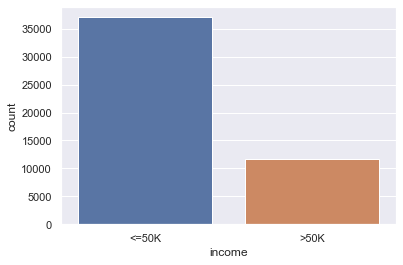

In [168]:
sns.countplot(adult_data.income)

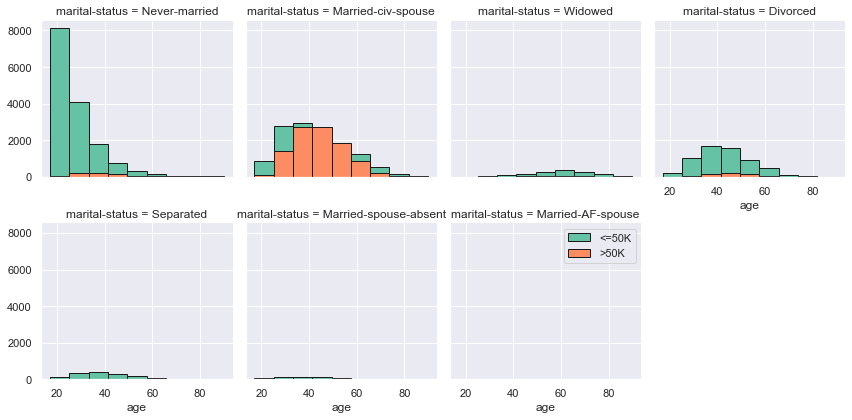

In [169]:
bins=np.linspace(adult_data.age.min(),adult_data.age.max(),10)
g=sns.FacetGrid(adult_data,col="marital-status",hue="income",palette="Set2",col_wrap=4)
g.map(plt.hist,"age",bins=bins,ec="k")
g.axes[-1].legend()
plt.show()

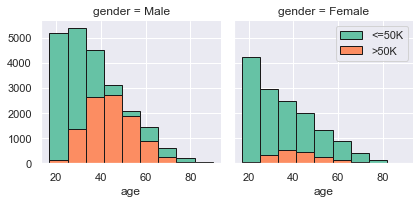

In [170]:
bins=np.linspace(adult_data.age.min(),adult_data.age.max(),10)
g=sns.FacetGrid(adult_data,col="gender",hue="income",palette="Set2",col_wrap=2)
g.map(plt.hist,"age",bins=bins,ec="k")
g.axes[-1].legend()
plt.show()

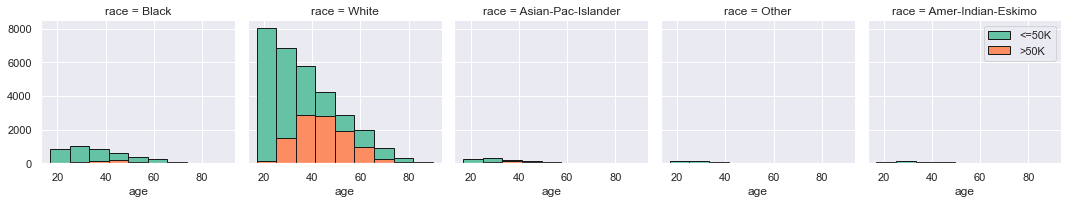

In [171]:
bins=np.linspace(adult_data.age.min(),adult_data.age.max(),10)
g=sns.FacetGrid(adult_data,col="race",hue="income",palette="Set2",col_wrap=5)
g.map(plt.hist,"age",bins=bins,ec="k")
g.axes[-1].legend()
plt.show()

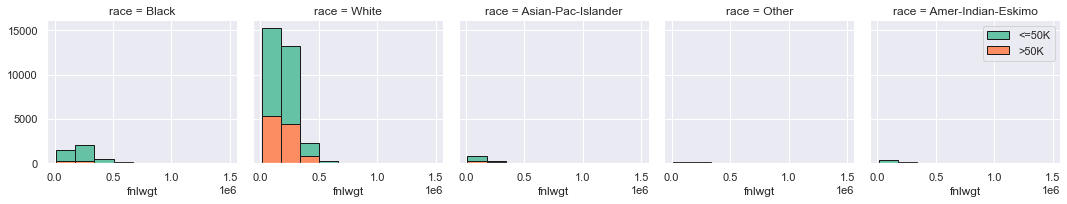

In [172]:
bins=np.linspace(adult_data.fnlwgt.min(),adult_data.fnlwgt.max(),10)
g=sns.FacetGrid(adult_data,col="race",hue="income",palette="Set2",col_wrap=5)
g.map(plt.hist,"fnlwgt",bins=bins,ec="k")
g.axes[-1].legend()
plt.show()

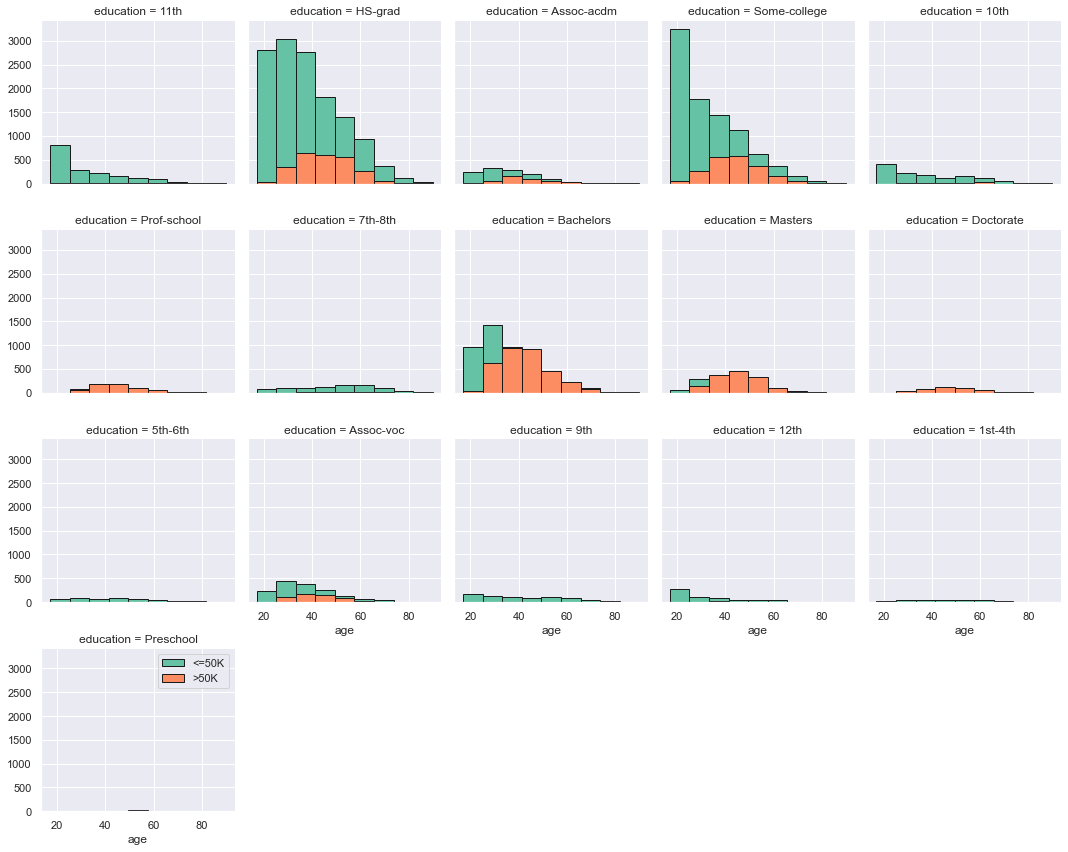

In [173]:
bins=np.linspace(adult_data.age.min(),adult_data.age.max(),10)
g=sns.FacetGrid(adult_data,col="education",hue="income",palette="Set2",col_wrap=5)
g.map(plt.hist,"age",bins=bins,ec="k")
g.axes[-1].legend()
plt.show()

<AxesSubplot:xlabel='relationship', ylabel='count'>

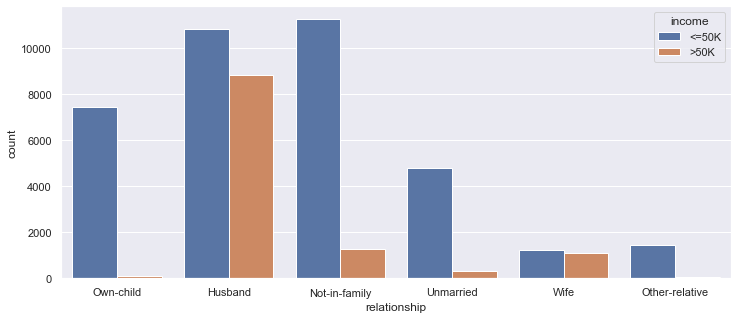

In [174]:
fig,ax = plt.subplots(figsize = (12,5))
sns.countplot(x='relationship', hue='income', data=adult_data, ax=ax)

<AxesSubplot:xlabel='occupation', ylabel='count'>

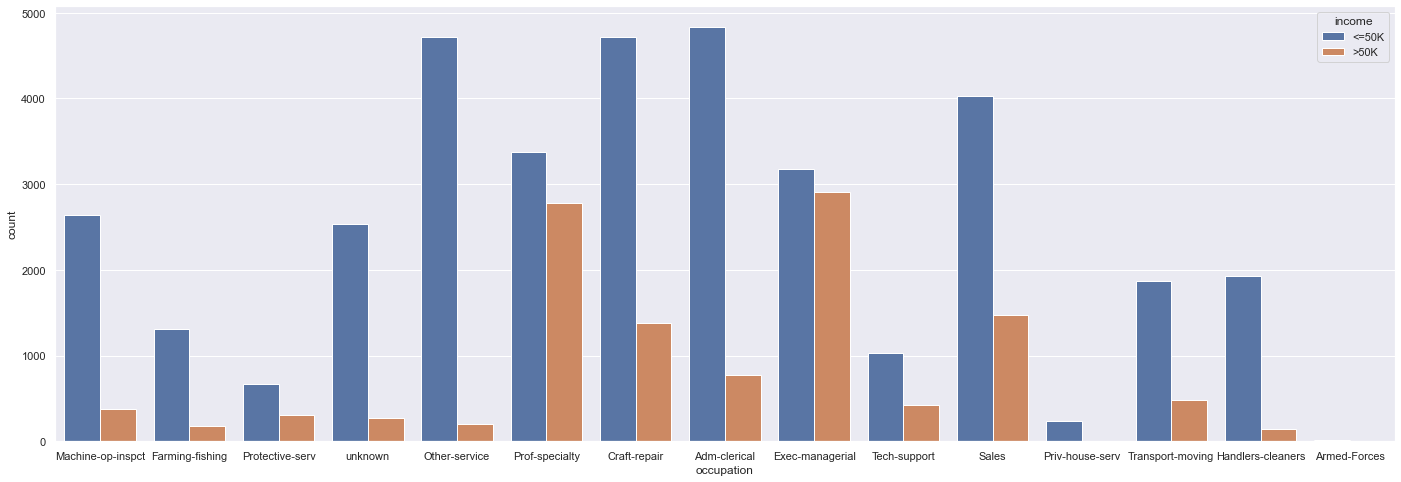

In [175]:
fig, ax = plt.subplots(figsize = (24, 8))
sns.countplot(x='occupation', hue='income', data=adult_data, ax=ax)

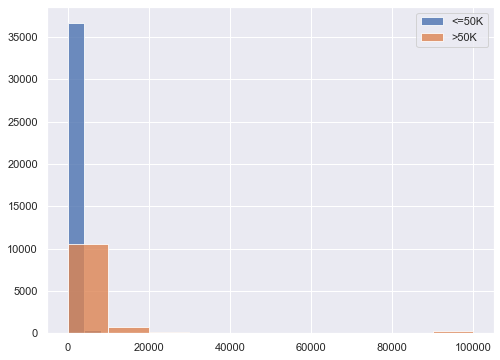

In [176]:
fig, ax = plt.subplots(figsize = (8,6))

for (i, d) in adult_data.groupby('income'):
    d['capital-gain'].hist(alpha = 0.8, ax=ax, label=i)

ax.legend()

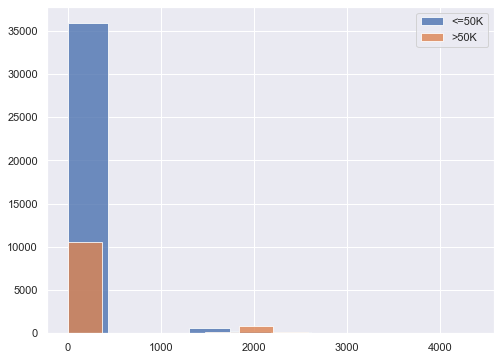

In [177]:
fig, ax = plt.subplots(figsize = (8,6))

for (i, d) in adult_data.groupby('income'):
    d['capital-loss'].hist(alpha = 0.8, ax=ax, label=i)

ax.legend()

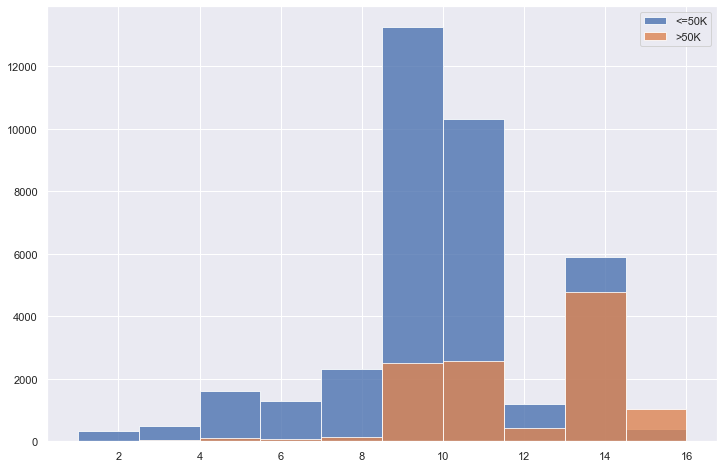

In [178]:
fig, ax = plt.subplots(figsize = (12,8))

for (i, d) in adult_data.groupby('income'):
    d['educational-num'].hist(alpha = 0.8, ax=ax, label=i)

ax.legend()

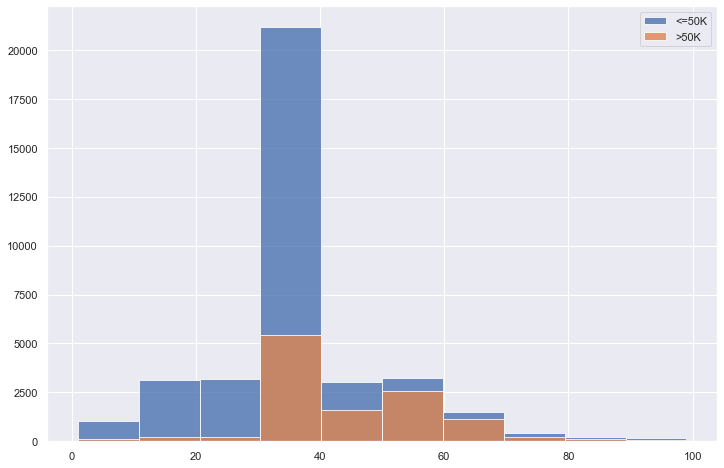

In [179]:
fig, ax = plt.subplots(figsize = (12,8))

for (i, d) in adult_data.groupby('income'):
    d['hours-per-week'].hist(alpha = 0.8, ax=ax, label=i)

ax.legend()

<AxesSubplot:xlabel='hours-per-week', ylabel='workclass'>

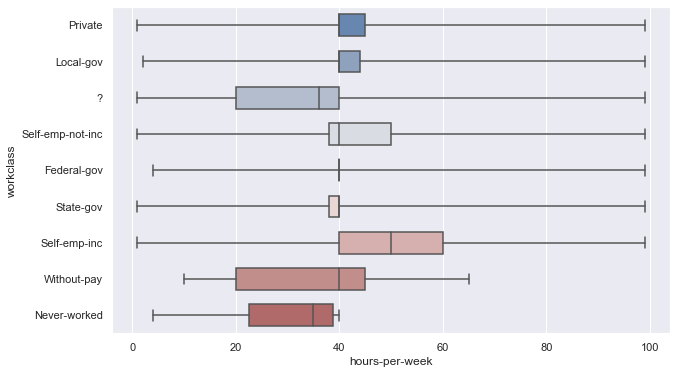

In [180]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(x="hours-per-week", y="workclass", data=adult_data,
            whis=[0, 100], width=.6, palette="vlag", ax=ax)